In [21]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data_folders = [f for f in os.listdir('data') if os.path.isdir(os.path.join('data', f))]

dfs = []

for folder in data_folders:
    file_path = os.path.join('data', folder, 'projectinfo.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['source_folder'] = folder
        dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True, sort=False)


In [23]:
print("Shape of merged dataframe:", merged_df.shape)
pd.set_option('display.max_columns', None)
merged_df.sample(10)

Shape of merged dataframe: (3692, 38)


,project_name,status,location,Project uses,Floors (above ground),Podium,Construction type,Parking spaces,Office space (sqft),source_folder,Developer,Architect,# of apartments,Architects,Height (ft),Floors (below),Consultant,# of rooms,# of condos,Retail space (sqft),Podium floors,Developers,Construction,General Contractor,Electrical - low voltage,Engineers,Landscape design/architect,Electrical - low voltages,Consultants,Property management,Interior design,Engineer,Lender,Lenders,Landscape design/architects,Constructions,CRE Broker,CRE Brokers
1183,831 Westlake Avenue,Proposed,"831 S Westlake Ave Los Angeles, CA 90057","['Apartments', 'Parking']",7.0,Yes,Type 2,NaN,NaN,07340c16_831-westlake-avenue,['Raman Nourizad'],NaN,79.0,NaN,NaN,NaN,['Mobbil Inc.'],NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Mobbil Inc.'],NaN,NaN,NaN,NaN,NaN,NaN
1547,The Albany,Proposed,"1330 Pico Blvd Los Angeles, CA 90015","['Retail', 'Hotel', 'Parking']",37.0,No,Type 1,430.0,NaN,16110f9a_the-albany,['Sandstone Properties'],NaN,NaN,"['HOK', 'Studio MLA']",480.0,NaN,NaN,730,NaN,"19,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['S Y Lee Associates Inc.'],NaN,NaN,NaN,NaN,NaN,NaN
648,Norwalk Veterans Housing,Proposed,"13705 San Antonio Drive Norwalk, CA 90650",['Apartments'],4.0,No,Type 2,NaN,NaN,f074b58a_norwalk-veterans-housing,['Mercy Housing'],['TCA Architects'],60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3022,Paseo at Californian - 1901 W 6th Street,Completed,"1901 West 6th Street Los Angeles, CA 90057",['Apartments'],6.0,No,Type 3 4 5,NaN,NaN,85e07157_paseo-at-californian-1901-w-6th-street,NaN,['PSL Architects'],53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['American Communities', 'LLC']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,1134 Westmoreland Avenue,Proposed,"1134 N Westmoreland Ave Los Angeles, CA 90029",['Condos'],NaN,No,Type 2,NaN,NaN,a195ebfe_1134-westmoreland-avenue,['Stradella Group'],NaN,NaN,NaN,NaN,NaN,['Hayden Planning'],NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,11209 Richland Avenue,Completed,"11209 Richland Avenue Los Angeles, CA 90064",['Apartments'],4.0,No,Type 3 4 5,NaN,NaN,9c2e762e_11209-richland-avenue,NaN,['Giovanni Uriu'],13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3302,1701-1717 W 6th Street,Approved,"1701 W 6th Street Los Angeles, CA 90017","['Apartments', 'Retail', 'Parking']",6.0,No,Type 3 4 5,72.0,NaN,b99e1388_1701-1717-w-6th-street,['Elias Shokrian'],['Icon & Ikon'],100.0,NaN,NaN,NaN,['Harvey Goodman Civil Engineering'],NaN,NaN,"15,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1117,1236 N Fairfax Avenue,Completed,"1236 N Fairfax Ave West Hollywood, CA 90046","['Condos', 'Parking']",4.0,No,Type 3 4 5,NaN,NaN,37b88506_1236-n-fairfax-avenue,['FMB Development'],['Bittoni Architects'],NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3588,3547 N. Figueroa Street,Proposed,"3547 N Figueroa St Los Angeles, CA 90065","['Apartments', 'Retail', 'Parking']",5.0,No,Type 2,NaN,NaN,87b571b3_3547-n-figueroa-street,['Greg Sharp'],NaN,55.0,NaN,NaN,NaN,['Craig Lawson & Co.'],NaN,NaN,"7,379",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3634,Esperanza at Duarte Station,Under construction,"1801 Highland Avenue Duarte, CA 91010","['Apartments', 'Parking']",5.0,No,Type 2,NaN,NaN,c6e8b901_esperanza-at-duarte-station,['MBK Rental Living'],['Architects Orange'],344.0,NaN,NaN,NaN,['R.D. Olson Construction'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
columns_to_analyze = ['Floors (above ground)', 'Parking spaces', 'Height (ft)', 'Floors (below)', 'Podium floors']


stats = pd.DataFrame({
    'Mean': merged_df[columns_to_analyze].mean(),
    'Non-NaN Count': merged_df[columns_to_analyze].count()
})

print("Statistics:")
print(stats)

Statistics:
                             Mean  Non-NaN Count
Floors (above ground)    6.943579           3403
Parking spaces         289.407715           1685
Height (ft)            235.458967            329
Floors (below)           1.996835            948
Podium floors            1.849032            775


In [25]:
# merged_df.to_csv('merged_data.csv', index=False)

In [26]:
#'Project uses' column by removing brackets and single quotes
merged_df['Project uses'] = merged_df['Project uses'].fillna('')  # Handle NaN values
merged_df['Project uses'] = merged_df['Project uses'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", "")

#split
merged_df['Project uses'] = merged_df['Project uses'].str.split(',')
merged_df['Project uses'] = merged_df['Project uses'].apply(lambda x: [use.strip() for use in x])

#unique project uses
all_uses = set()
for uses in merged_df['Project uses']:
    all_uses.update(uses)
all_uses.discard('')  # Remove empty string if present

#project use binary columns
for use in all_uses:
    col_name = f'use_{use.lower().replace(" ", "_")}'
    merged_df[col_name] = merged_df['Project uses'].apply(lambda x: 1 if use in x else 0)


In [27]:
print("Shape of merged dataframe:", merged_df.shape)
pd.set_option('display.max_columns', None)
merged_df.sample(10)

Shape of merged dataframe: (3692, 50)


,project_name,status,location,Project uses,Floors (above ground),Podium,Construction type,Parking spaces,Office space (sqft),source_folder,Developer,Architect,# of apartments,Architects,Height (ft),Floors (below),Consultant,# of rooms,# of condos,Retail space (sqft),Podium floors,Developers,Construction,General Contractor,Electrical - low voltage,Engineers,Landscape design/architect,Electrical - low voltages,Consultants,Property management,Interior design,Engineer,Lender,Lenders,Landscape design/architects,Constructions,CRE Broker,CRE Brokers,use_transportation,use_retail,use_greenspace,use_hotel,use_condos,use_medical,use_office,use_parking,use_apartments,use_cultural,use_sfh,use_townhomes
3223,The Boardwalk OC,Completed,"18691 Jamboree Rd Irvine, CA 92612","[Retail, Office, Parking]",9.0,No,Type 1,NaN,"545,000",de610ac9_the-boardwalk-oc,['Trammell Crow Company'],['Gensler'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,0,0,0,0
539,One Santa Fe,Completed,"300 South Santa Fe Avenue Los Angeles, CA 9...","[Apartments, Retail]",6.0,No,Type 3 4 5,NaN,NaN,08ae6c92_one-santa-fe,NaN,NaN,438.0,NaN,NaN,NaN,NaN,NaN,NaN,"80,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,1,0,0,0
5,1414 N. Las Palmas Avenue,Proposed,"1414 N Las Palmas Avenue Los Angeles, CA 90028",[Condos],NaN,No,Sfh,NaN,NaN,d7e88265_1414-n-las-palmas-avenue,['Top You LLC'],['NS Designs'],NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0
497,12001 Atlantic,Proposed,"12001 Atlantic Ave Lynwood, CA 90262","[Apartments, Parking]",4.0,No,Type 2,119.0,NaN,d589aebe_12001-atlantic,NaN,NaN,66.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,1,0,0,0
3384,Union Bank Plaza Renovation,Completed,"459 S Figueroa St Los Angeles, CA 90071","[Retail, Office, Parking]",40.0,No,Rehab,NaN,"70,000",e5200cde_union-bank-plaza-renovation,['KBS'],['HLW International'],NaN,NaN,NaN,NaN,['Swinerton Builders'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,0,0,0,0
840,3980 W 6th Street,Proposed,"3980 West 6th Street Los Angeles, CA 90020","[Apartments, Retail]",5.0,No,Type 3 4 5,NaN,NaN,a6bf6227_3980-w-6th-street,['Central Triad Holdings LLC'],['AFCO Design'],51.0,NaN,NaN,NaN,NaN,NaN,NaN,"3,500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,1,0,0,0
692,The West Edge,Completed,"12101 W Olympic Blvd Los Angeles, CA 90064","[Apartments, Retail, Office, Parking]",8.0,Yes,Type 1 2,1876.0,"200,000",7460c763_the-west-edge,NaN,NaN,600.0,"['Gensler', 'Togawa Smith Martin', 'Rios Cleme...",160.0,3.0,"[""W.E. O'Neil Construction""]",NaN,NaN,"90,000",2.0,"['Philena Properties', 'Hines', 'USAA Real Est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,1,0,0,0
605,4319 Sepulveda,Proposed,"4319 Sepulveda Culver City, CA 90230","[Apartments, Retail, Parking]",5.0,No,Type 3 4 5,545.0,NaN,cd76f3ca_4319-sepulveda,['Dr. Ehab Yacoub and Lorine Mikheail'],['Nassef A Eskander & Associates'],21.0,NaN,NaN,2.0,NaN,NaN,NaN,"3,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,1,0,0,0
1153,4737 Elmwood Avenue,Under construction,"4737 Elmwood Avenue Los Angeles, CA 90004","[Condos, Parking]",4.0,No,Type 2,NaN,NaN,f8b24d83_4737-elmwood-avenue,['Millennium Homes Inc.'],NaN,NaN,"['Figure 8 Group', ""O' Spring Studio""]",NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['EGL Associates', 'JLee Engineering Inc.', 'P...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,1,0,0,0,0
217,L.A. County + USC Restorative Care Village,Under construction,"1200 N State St Los Angeles, CA 90033","[Apartments, Office, Medical, Parking]",4.0,No,Type 1,NaN,NaN,347d2c6b_l-a-county-usc-restorative-care-village

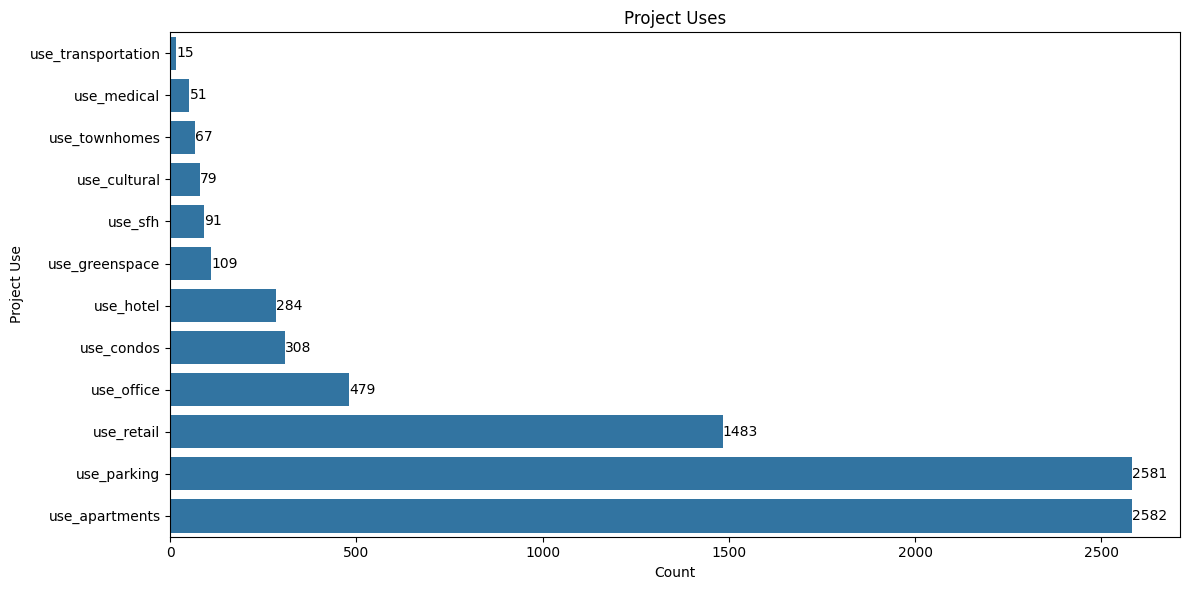

In [28]:
use_columns = [col for col in merged_df.columns if col.startswith('use_')]

frequencies = merged_df[use_columns].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))

sns.barplot(x=frequencies.values, y=frequencies.index)
plt.title('Project Uses')
plt.xlabel('Count')
plt.ylabel('Project Use')

for i, v in enumerate(frequencies.values):
    plt.text(v + 0.5, i, str(int(v)), va='center')

plt.tight_layout()
plt.show()

In [29]:
#create multifamily column
merged_df['multifamily'] = ( 
                           (merged_df['use_condos'] == 1) |
                           (merged_df['use_apartments'] == 1) |
                           (merged_df['use_townhomes'] == 1)).astype(int)


In [30]:
#merge Architect and Architects columns
merged_df['Architect'] = merged_df['Architect'].fillna(merged_df['Architects'])
merged_df.drop('Architects', axis=1, inplace=True)


In [31]:
#merge Developer and Developers columns
merged_df['Developer'] = merged_df['Developer'].fillna(merged_df['Developers'])
merged_df.drop('Developers', axis=1, inplace=True)


In [32]:
#filter for multifamily projects
multifamily_df = merged_df[merged_df['multifamily'] == 1]

multifamily_df['Architect'] = multifamily_df['Architect'].str.strip('[]').str.split(',')
architect_counts = multifamily_df.explode('Architect')['Architect'].str.strip().str.strip("'").value_counts()

multifamily_df['Developer'] = multifamily_df['Developer'].str.strip('[]').str.split(',')
developer_counts = multifamily_df.explode('Developer')['Developer'].str.strip().str.strip("'").value_counts()

architect_counts.to_csv('architect_counts.csv')
developer_counts.to_csv('developer_counts.csv')

/var/folders/w4/8bdyf7817wzghq2ypzxtqpcm0000gn/T/ipykernel_59695/164708222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multifamily_df['Architect'] = multifamily_df['Architect'].str.strip('[]').str.split(',')
/var/folders/w4/8bdyf7817wzghq2ypzxtqpcm0000gn/T/ipykernel_59695/164708222.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multifamily_df['Developer'] = multifamily_df['Developer'].str.strip('[]').str.split(',')


In [33]:
multifamily_df['housing_units'] = multifamily_df.apply(lambda x: float('nan') if pd.isna(x['# of apartments']) and pd.isna(x['# of condos']) else (0 if pd.isna(x['# of apartments']) else x['# of apartments']) + (0 if pd.isna(x['# of condos']) else x['# of condos']), axis=1)



/var/folders/w4/8bdyf7817wzghq2ypzxtqpcm0000gn/T/ipykernel_59695/3679484053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multifamily_df['housing_units'] = multifamily_df.apply(lambda x: float('nan') if pd.isna(x['# of apartments']) and pd.isna(x['# of condos']) else (0 if pd.isna(x['# of apartments']) else x['# of apartments']) + (0 if pd.isna(x['# of condos']) else x['# of condos']), axis=1)


In [34]:
# Filter out housing units that are NaN or less than 2
multifamily_df = multifamily_df[
    (multifamily_df['housing_units'].notna()) & 
    (multifamily_df['housing_units'] >= 2)
]


Maximum housing units: 60000.0


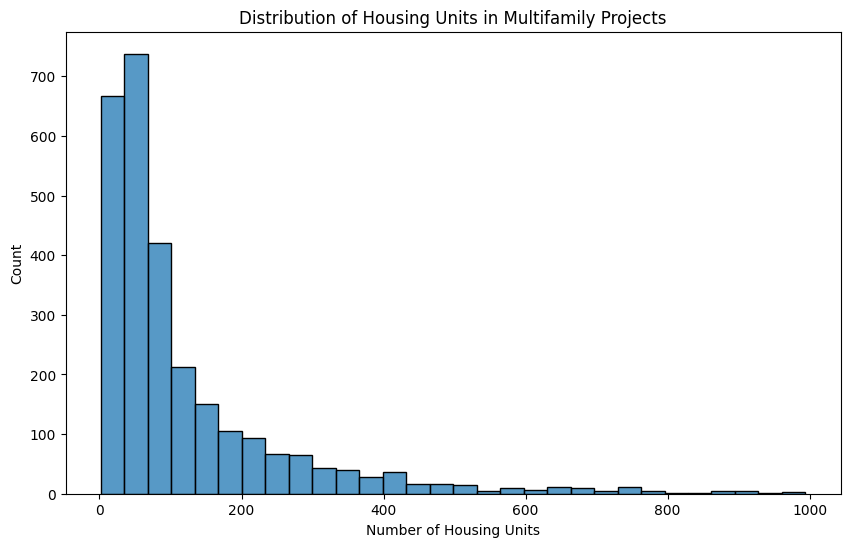

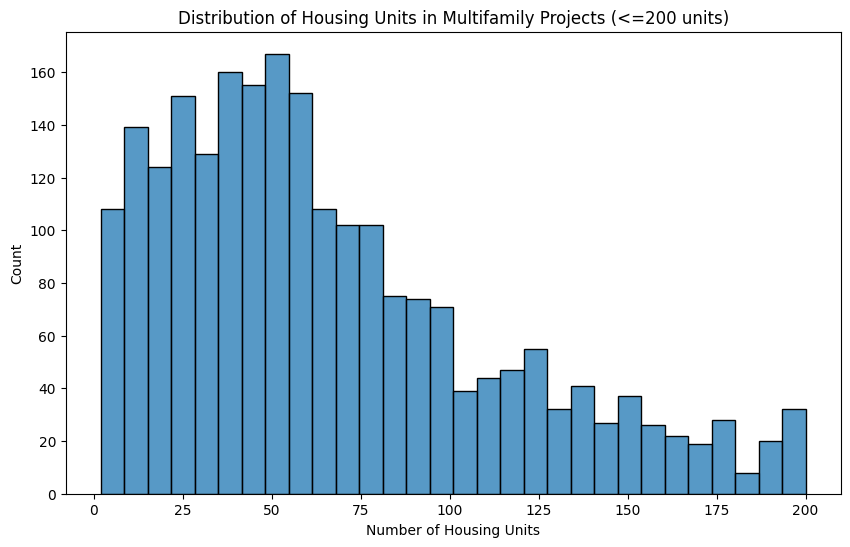

In [35]:
print(f"Maximum housing units: {multifamily_df['housing_units'].max()}")
# Set housing_units to NaN for unrealistically large values (>5000)
multifamily_df.loc[multifamily_df['housing_units'] > 5000, 'housing_units'] = float('nan')


plt.figure(figsize=(10, 6))
sns.histplot(data=multifamily_df[multifamily_df['housing_units'] <= 1000], x='housing_units', bins=30)
plt.title('Distribution of Housing Units in Multifamily Projects')
plt.xlabel('Number of Housing Units')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=multifamily_df[multifamily_df['housing_units'] <= 200], x='housing_units', bins=30)
plt.title('Distribution of Housing Units in Multifamily Projects (<=200 units)')
plt.xlabel('Number of Housing Units')
plt.ylabel('Count')
plt.show()


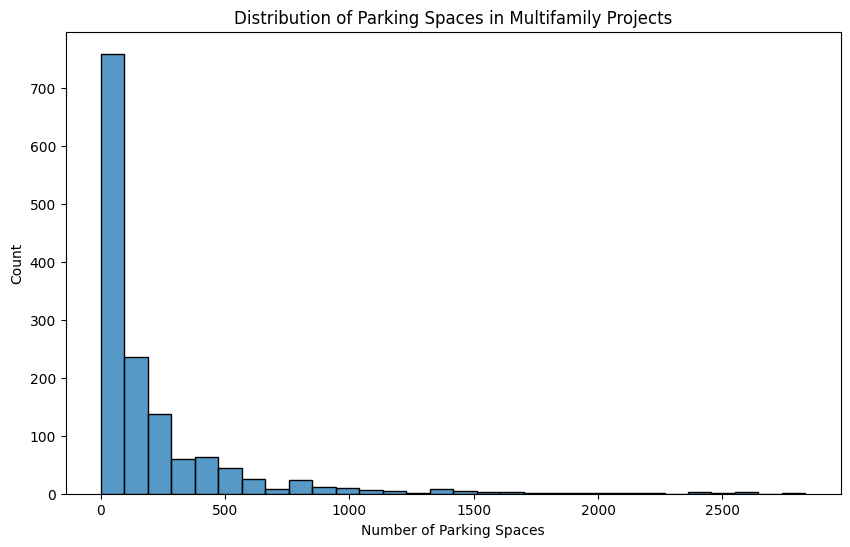

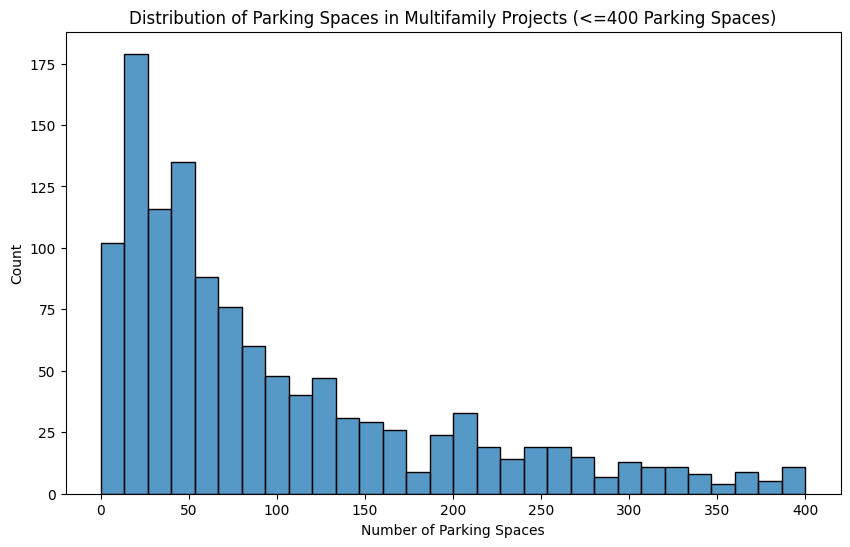

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=multifamily_df[multifamily_df['Parking spaces'] <= 3000], x='Parking spaces', bins=30)
plt.title('Distribution of Parking Spaces in Multifamily Projects')
plt.xlabel('Number of Parking Spaces') 
plt.ylabel('Count')
plt.show()

# histogram of parking spaces - zoomed to <=1000
plt.figure(figsize=(10, 6))
sns.histplot(data=multifamily_df[multifamily_df['Parking spaces'] <= 400], x='Parking spaces', bins=30)
plt.title('Distribution of Parking Spaces in Multifamily Projects (<=400 Parking Spaces)')
plt.xlabel('Number of Parking Spaces') 
plt.ylabel('Count')
plt.show()




In [37]:
missing_counts = multifamily_df[['housing_units', 'Parking spaces', 'Developer', 'Architect']].isna().sum()
# missing_both = multifamily_df[multifamily_df['# of apartments'].isna() & multifamily_df['# of condos'].isna()]

print("Number of multifamily projects missing information:")
for field, count in missing_counts.items():
    print(f"{field}: {count} projects")
# print(f"Nnumber of apartments and number of condos: {len(missing_both)}")


Number of multifamily projects missing information:
housing_units: 2 projects
Parking spaces: 1385 projects
Developer: 164 projects
Architect: 497 projects


In [48]:
zero_parking = len(multifamily_df[multifamily_df['Parking spaces'] == 0])
print(f"Number of multifamily projects with zero parking spaces: {zero_parking}")

# top 10 projects by parking spaces
top_10_parking = multifamily_df.nlargest(10, 'Parking spaces')[['project_name', 'Parking spaces']]
print("\nTop 10 projects by number of parking spaces:")
for idx, row in top_10_parking.iterrows():
    print(f"{row['project_name']}: {int(row['Parking spaces'])} spaces")

# random sample 10 projects missing parking information
missing_parking = multifamily_df[multifamily_df['Parking spaces'].isna()][['project_name', 'housing_units']].head(10)
print("\nSample of 10 projects missing parking information:")
for idx, row in missing_parking.iterrows():
    print(f"{row['project_name']}: {int(row['housing_units']) if not pd.isna(row['housing_units']) else 'unknown'} units")

# count projects with more than 500 parking spaces
over_400_parking = len(multifamily_df[multifamily_df['Parking spaces'] > 500])
print(f"\nNumber of multifamily projects with more than 400 parking spaces: {over_400_parking}")

# averages for parking spaces above and below 500
above_500_avg = multifamily_df[multifamily_df['Parking spaces'] > 500]['Parking spaces'].mean()
below_500_avg = multifamily_df[multifamily_df['Parking spaces'] <= 500]['Parking spaces'].mean()

print(f"\nAverage parking spaces for projects with >500 spaces: {above_500_avg:.1f}")
print(f"Average parking spaces for projects with <=500 spaces: {below_500_avg:.1f}")


Number of multifamily projects with zero parking spaces: 1

Top 10 projects by number of parking spaces:
Angel Stadium Master Plan: 12500 spaces
OC Vibe: 8700 spaces
Baldwin Hills Crenshaw Plaza: 6829 spaces
Related Bristol: 6250 spaces
Promenade 2035: 5655 spaces
The Village Santa Ana: 3520 spaces
LT Platinum Center: 3500 spaces
670 Mesquit: 3500 spaces
6AM: 3441 spaces
District NoHo: 3313 spaces

Sample of 10 projects missing parking information:
1408 W. Jefferson Boulevard: 70 units
1414 N. Las Palmas Avenue: 4 units
1043-1049 S. Harvard Boulevard: 47 units
6464 Santa Monica Blvd: 8 units
1437 6th Street - Santa Monica: 62 units
943 W. 82nd Street: 39 units
4804 Oakwood Avenue: 30 units
One San Pedro: 47 units
14715 W Burbank Blvd: 91 units
3642 Motor Avenue: 62 units

Number of multifamily projects with more than 400 parking spaces: 167

Average parking spaces for projects with >500 spaces: 1273.4
Average parking spaces for projects with <=500 spaces: 115.0


In [38]:
columns_to_analyze = ['housing_units', 'Floors (above ground)', 'Parking spaces', 'Height (ft)', 'Floors (below)', 'Podium floors']


stats = pd.DataFrame({
    'Mean': multifamily_df[columns_to_analyze].mean(),
    'Non-NaN Count': multifamily_df[columns_to_analyze].count()
})

print("Statistics:")
print(stats)

Statistics:
                             Mean  Non-NaN Count
housing_units          133.708555           2817
Floors (above ground)    7.121450           2676
Parking spaces         249.907950           1434
Height (ft)            243.857143            238
Floors (below)           1.973848            803
Podium floors            1.850480            729


In [39]:
multifamily_df.shape

(2819, 50)

In [40]:
merged_df.to_csv('merged_data.csv', index=False)
# merged_df.to_stata('merged_data.dta', write_index=False)

In [41]:
multifamily_df.to_csv('multifamilyonly_merged_data.csv', index=False)
